# Блок №2 Проект

В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике :)

# Задание
1. Загрузите [данные](https://disk.yandex.ru/d/Kl4mPINblwnJCA), проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (`Impressions`) для каждой рекламы, прологарифмировав значения.
3. Создайте новую колонку c `CTR`. Посмотрите на описательные статистики и распределение.
4. Проанализируйте `CTR` с разбивкой по рекламной кампании.
5. Посчитайте стоимость за клик пользователя по объявлению (`CPC`). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализируйте `CPC` с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитайте конверсию из клика в покупку.

# Описание данных
+ `ad_id – идентификатор объявления (рекламы)
+ `xyz_campaign_id` – идентификатор рекламной кампании в базе компании X
+ `fb_campaign_id` – идентификатор кампании в Facebook
+ `age` – возрастная группа, которой показывалась реклама
+ `gender` – пол тех, кому показывалась реклама
+ `interest` –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
+ `impressions` – число показов
+ `clicks` – число кликов
+ `spent` – сумма, которую компания потратила на показ объявления 
+ `total_conversion` – количество людей, которые заинтересовались продуктом после просмотра рекламы
+ `approved_conversion` – количество людей, которые купили продукт после просмотра рекламы

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

import scipy.stats as ss

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16, 6)}, style='whitegrid')

# Задача №1
___
Загрузите [данные](https://disk.yandex.ru/d/Kl4mPINblwnJCA), проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

In [11]:
# Загрузим данные
conv = pd.read_csv('/home/jupyter-a.stamati-16/Statistic/conversion.csv')

In [12]:
# Посмотрим на данные
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
# Посмотрми на размер таблицы
conv.shape

(1143, 11)

In [5]:
# Посмотрим на тип дынных
conv.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [6]:
# Проверим наличие пропущенных значений
conv.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [7]:
# Посмотрим на количество униклаьных значений в колонках
conv.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [13]:
# Найдем ответ на задачу
conv.nunique().loc['xyz_campaign_id']

3

# Задание №2
___
Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.

In [14]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


Ответ:
![](https://sun9-66.userapi.com/impg/LQnCXZbXm-_3bBLvCirO4qNVwxKuewp4PjZLjQ/Vtkx9iHwMdI.jpg?size=567x341&quality=96&sign=2ca1490e65e1f3a355afe4b18eef02ac&type=album)

# Задание №3

Постройте график распределения числа показов (`Impressions` – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:
+ Распределение симметричное
+ Полученное распределение является нормальным
+ Распределение унимодальное
+ Полученное распределение не является нормальным
+ Распределение бимодальное

In [20]:
conv_log = conv \
        .groupby('fb_campaign_id') \
        .agg({'Impressions' : 'sum'}) \
        .apply(lambda x: np.log(x))

conv_log.head()

,Impressions
fb_campaign_id,
103916,8.902456
103917,9.790375
103920,6.541030
103928,9.035034
103929,7.557473


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


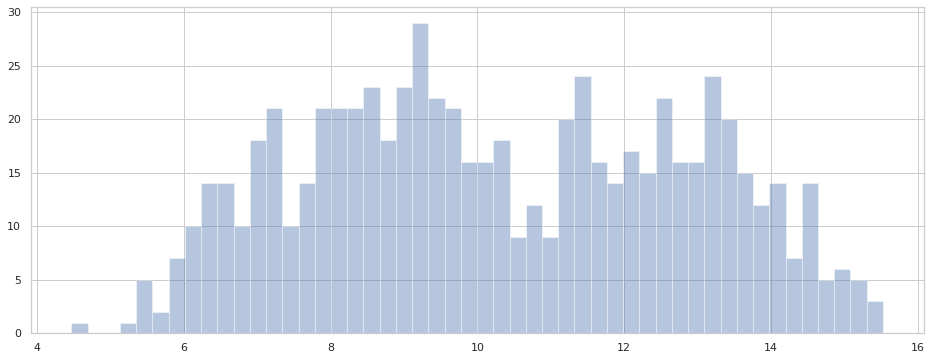

In [21]:
sns.distplot(conv_log, kde=False, bins=50);

In [23]:
# Еще один способ
# sns.distplot(np.log(conv.groupby('fb_campaign_id').Impressions.sum()), kde=False, bins=50);

Ответ:
+ Полученное распределение не является нормальным
+ Распределение бимодальное

# Задание №4
___
Теперь посчитаем ещё несколько полезных метрик. Первая – `CTR` (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

$CTR=\frac{clicks}{impressions}$

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [28]:
# Зададим новую колонку с показателем CTR
conv['ctr'] = conv['Clicks'] /conv['Impressions']

In [31]:
conv.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [29]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [33]:
# Отберем нужные данные для ответа
conv.loc[conv.ctr.idxmax(), 'ad_id']
# conv.iloc[conv.ctr.idxmax()]['ad_id']

738637

# Задание №5
___
Визуализируйте CTR с разбивкой по номеру рекламной кампании (`xyz_campaign_id`). Какому графику соответствует распределение CTR кампании 916?
![](https://storage.yandexcloud.net/klms-public/production/learning-content/11/79/614/1768/8104/dfdfd.png)
Параметр bins=20

In [34]:
conv_for_916 = conv \
                .query('xyz_campaign_id == "916"') \
                .ctr

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


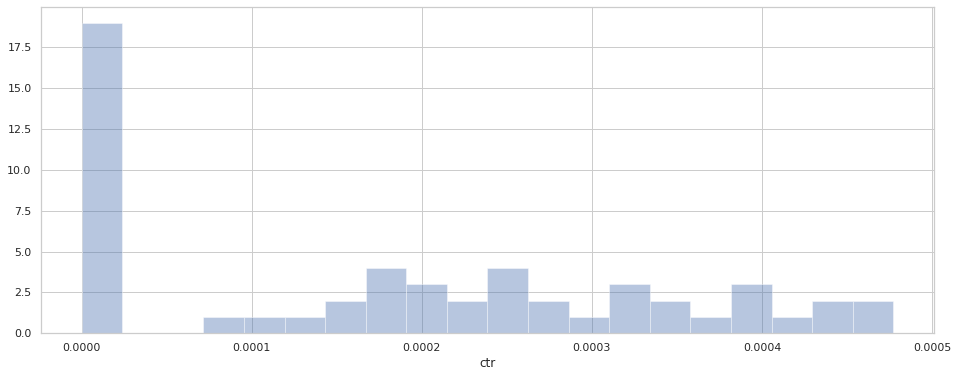

In [35]:
sns.distplot(conv_for_916, kde=False, bins=20);

Ответ:
```
C
```

# Задание №6
___
CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

$CPC=\frac{spent}{clicks}$ 

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию `iqr` из `scipy`, то следует указать аргумент `nan_policy='omit'`, чтобы их проигнорировать. При построении графика необходимо использовать метод `.dropna()`.

In [38]:
# Зададим новую колонку с метрикой CPC
conv['cpc'] = conv['Spent'] / conv['Clicks']

In [39]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [43]:
# Посмотрим на описательную статистику
conv.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [44]:
# Найдем межквартельный размах для CPC
round(ss.iqr(conv.cpc, nan_policy='omit'), 2)

0.25

In [45]:
# Дропнем пустые значения для построения графика
conv_cpc = conv \
            .cpc \
            .dropna()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


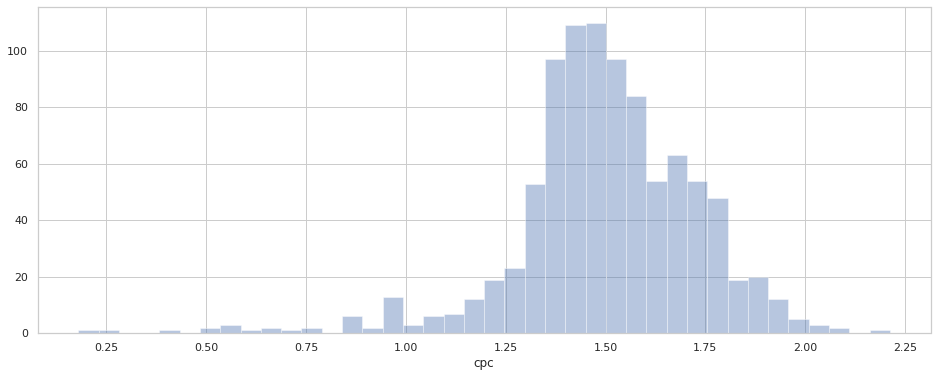

In [46]:
sns.distplot(conv_cpc, kde=False);

# Задание №7
___
Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?
![](https://ucarecdn.com/16ebfd6c-ac78-49db-afe0-323794338796/)
Чтобы избежать появление ошибки, можно указать .dropna() при построении графика. Обратите внимание, что удалять NaN из самого датасета не нужно, только для визуализации.

In [50]:
# Отберем данные cpc с разбивкой по полу для визуализации, дополнительно дропнем пустые значения 
conv_cpc_m = conv \
                .query('gender == "M"') \
                .cpc \
                .dropna()

conv_cpc_f = conv \
                .query('gender == "F"') \
                .cpc \
                .dropna()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


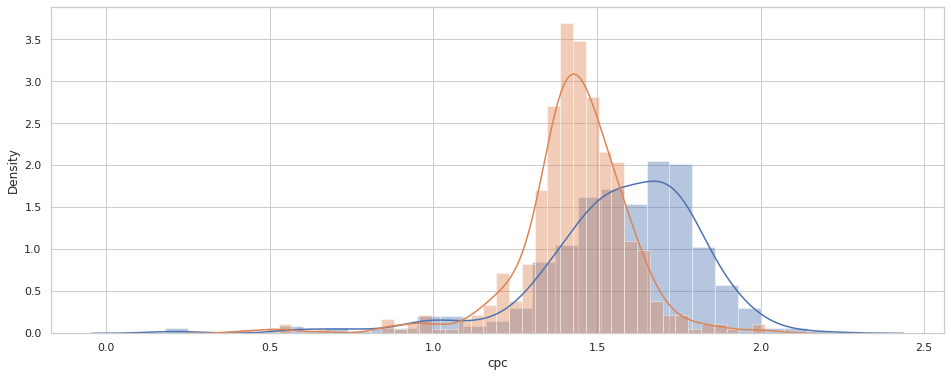

In [52]:
sns.distplot(conv_cpc_m)
sns.distplot(conv_cpc_f);

Ответ:
```
B
```

# Задание №8

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

клики – Clicks, покупки – Approved_Conversion.

In [61]:
# Добавим новую колонку с конверсией
conv['cr_app'] = round(conv['Approved_Conversion'] / conv['Clicks'] * 100, 2)

In [67]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr_app
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,100.0


In [63]:
# Отберем объявления для ответа
# conv.query('ad_id == 1121814')
conv.query('ad_id == 1121814').cr_app

860    3.09
Name: cr_app, dtype: float64